In [1]:
# SETUP pyDR
import os
os.chdir('../..')

In [2]:
#Imports
import pyDR

In [3]:
# Load the data
data=pyDR.IO.readNMR('pyDR/examples/HETs15N/HETs_15N.txt')

In [4]:
data.info

                   0           1           2           3           4           5           6           7
Type              R1          R1          R1         R1p         R1p         R1p         R1p         R1p
v0               400         500         850         850         850         850         500         500
v1               0.0         0.0         0.0        10.8        16.1        24.5        37.6        50.8
vr                 0           0           0          60          60          60          60          60
offset             0           0           0           0           0           0           0           0
stdev     0.00249149  0.00554449  0.00208680  1.08759999  0.65464997  0.68395000  0.56901997  1.18330001
med_val   0.04465600  0.03731900  0.02731099  3.81399989  3.52609992  3.61940002  3.92989993  5.97370004
Nuc              15N         15N         15N         15N         15N         15N         15N         15N
Nuc1              1H          1H          1H          1

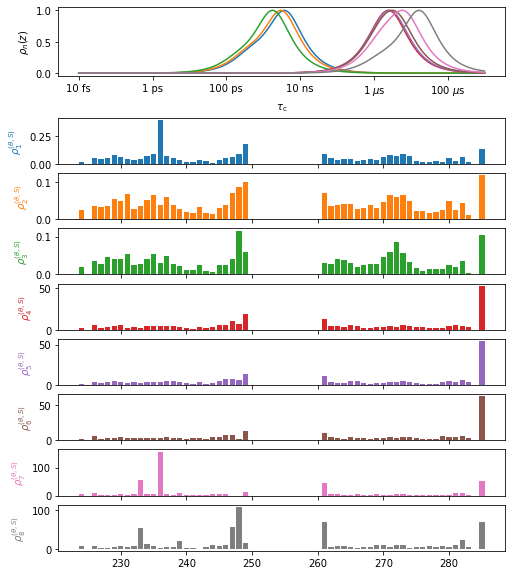

In [5]:
plt_obj=data.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])

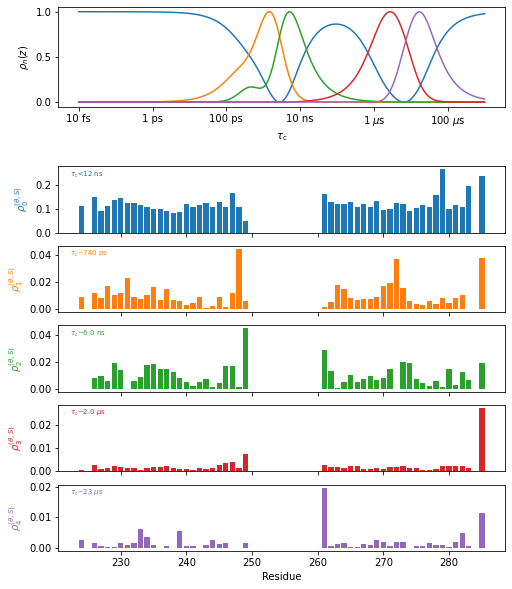

In [6]:
data.detect.r_auto(4).inclS2()  #Optimize the detectors
fit=data.fit()  #Fit the data

plt_obj=fit.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])
plt_obj.show_tc()
_=plt_obj.ax[-1].set_xlabel('Residue')

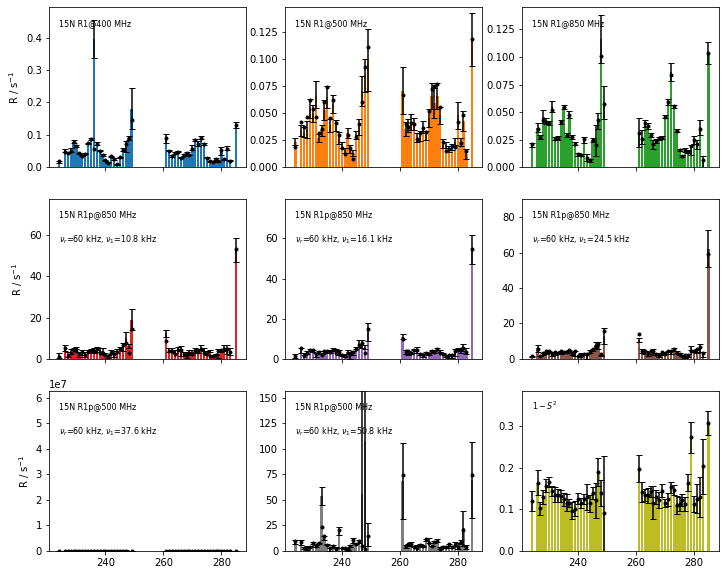

In [7]:
fig=fit.plot_fit()[0].axes.figure
fig.set_size_inches([12,10])

In [8]:
proj=pyDR.Project()  #Project without storage location
proj.append_data(data) #Add data to project
data.select=pyDR.MolSelect(topo='2kj3') #Add selection to data
#Note: you can use a local file, or download from the pdb database with 4-letter code

# data.label contains the residue numbers, so we can just point to these. 
#The pdb contains 3 copies of HET-s (segments A,B,C), so we have to select just one segment
_=data.select.select_bond(Nuc='N',resids=data.label,segids='B') #Define the selection

fit=data.fit()  #Selections are automatically passed from data to fit
#but, we do need to re-run the fit to achieve this

In [9]:
#Set chimera path (only required once)
pyDR.chimeraX.chimeraX_funs.set_chimera_path('/Applications/ChimeraX-1.5.app/Contents/MacOS/ChimeraX')

fit.chimera()
proj.chimera.command_line('~show ~/B@N,C,CA') #Send command to chimera

In [10]:
proj.chimera.close()
fit.chimera(rho_index=[1,2])
proj.chimera.command_line('~show ~/B@N,C,CA')

In [11]:
proj.chimera.close()
fit.chimera(rho_index=[3,4],scaling=200)
proj.chimera.command_line('~show ~/B@N,C,CA')

In [12]:
fit.nglview(0)  #Just provide the index of the detector to view

NGLWidget(max_frame=19)

In [13]:
fit.nglview(1)

NGLWidget(max_frame=19)